# 3D dose map analysis

Use the output of the following simulation:
- Folder: fluoroscopy/
- Macros: fluoroscopy.mac


In [13]:
%matplotlib widget
#!pip install SimpleITK
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
from ipywidgets import interact
import os
from pathlib import Path

In [14]:
# The following command display the current working directory (where jupyter has been launched)
cwd = os.getcwd()
print('The Current Working Directory (CWD) is: \n', cwd)
folder = Path()
if (not folder.is_dir()):
    print('ERROR: {} is not a folder.'.format(folder))

The Current Working Directory (CWD) is: 
 /home/lunet/phvj/Examples/fluoroscopy


In [15]:
filename = os.path.join(folder, './output/3d-fluoroscopy-Dose.mhd')    # <--------------------------------------TO CHANGE BY YOUR OWN OUTPUT FOLDER 
img_dose = sitk.ReadImage(filename)
arr_dose = sitk.GetArrayFromImage(img_dose)
print('Image size = ', arr_dose.shape)
print('Image min and max: ',  np.amin(arr_dose), np.amax(arr_dose))

Image size =  (50, 50, 50)
Image min and max:  0.0 7.8666414e-11


In [16]:
filename = os.path.join(folder, './output/3d-fluoroscopy-Dose-Uncertainty.mhd')    # <--------------------------------------TO CHANGE BY YOUR OWN OUTPUT FOLDER 
img_dose_u = sitk.ReadImage(filename)
arr_dose_u = sitk.GetArrayFromImage(img_dose_u)
print('Image size = ', arr_dose.shape)
print('Image min and max: ',  np.amin(arr_dose_u), np.amax(arr_dose_u))

Image size =  (50, 50, 50)
Image min and max:  0.18762125 1.0


interactive(children=(IntSlider(value=25, description='sx', max=50), IntSlider(value=25, description='sy', max…

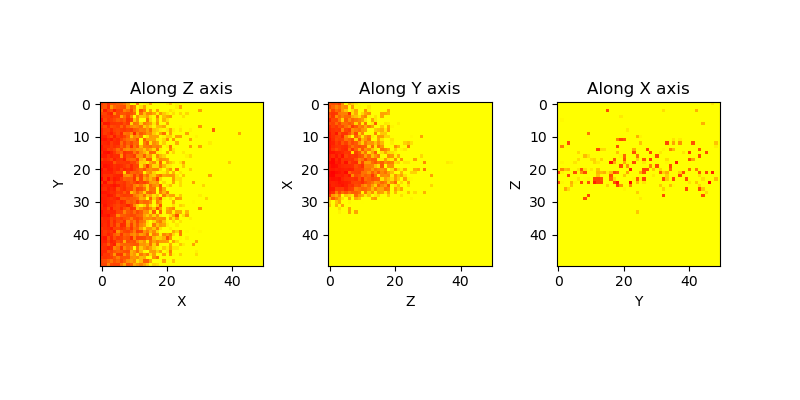

In [17]:
fig1, ax1 = plt.subplots(1,3,figsize=(8,4))
def show_dose(sx,sy,sz):
    ax1[0].imshow(arr_dose[sz,:,:], cmap=plt.cm.gray)
    ax1[0].imshow(arr_dose_u[sz,:,:],cmap=plt.cm.autumn)
    ax1[0].set_title('Along Z axis')
    ax1[0].set_xlabel('X')
    ax1[0].set_ylabel('Y')
    ax1[1].imshow(arr_dose[:,sy,:], cmap=plt.cm.gray)
    ax1[1].imshow(arr_dose_u[:,sy,:],cmap=plt.cm.autumn)
    ax1[1].set_title('Along Y axis')
    ax1[1].set_xlabel('Z')
    ax1[1].set_ylabel('X')
    ax1[2].imshow(arr_dose[:,:,sx], cmap=plt.cm.gray)
    ax1[2].imshow(arr_dose_u[:,:,sx],cmap=plt.cm.autumn)
    ax1[2].set_title('Along X axis')
    ax1[2].set_xlabel('Y')
    ax1[2].set_ylabel('Z')
plt.subplots_adjust(wspace=0.4,hspace=0.4,bottom=0.2)
interact(show_dose, sx=(0,img_dose.GetSize()[0]), sy=(0,img_dose.GetSize()[1]), sz=(0,img_dose.GetSize()[2]));
plt.savefig('dose_maps.png',dpi=300,bbox_inches="tight",pad_inches=None)


## Relationship between deposited energy and dose in all directions

In [18]:
filename_edep = os.path.join(str(folder), './output/3d-fluoroscopy-Edep.mhd')
img_edep = sitk.ReadImage(filename_edep)
arr_edep = sitk.GetArrayFromImage(img_edep)

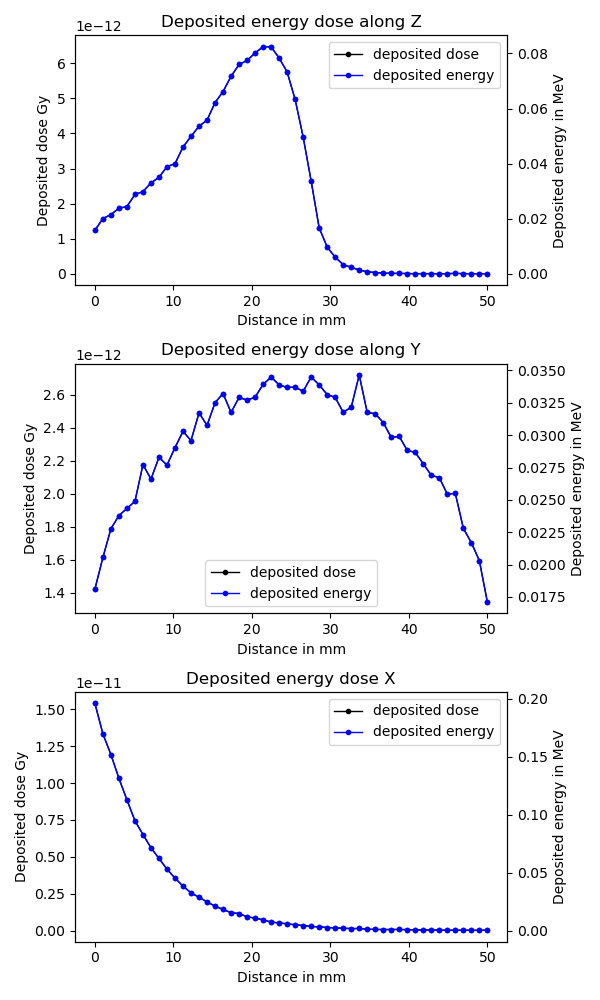

In [19]:
fig3, ax3 = plt.subplots(3,1,figsize=(6,10))
moy_dose=np.zeros(arr_dose.shape[0])
moy_edep=np.zeros(arr_edep.shape[0])
for i in range(arr_dose.shape[0]):
    subarr_dose=arr_dose[i,:,:]
    moy_dose[i]=np.mean(subarr_dose)
    subarr_edep=arr_edep[i,:,:]
    moy_edep[i]=np.mean(subarr_edep)
# X values from 0 to n
# n is the number of slices
n = arr_dose.shape[0]
x = np.linspace(0, n, n)
c1 = ax3[0].plot(x, moy_dose, 'k.-', label='deposited dose', linewidth=1)
ax3[0].set_title('Deposited energy dose along Z')
ax3[0].set_xlabel('Distance in mm')
ax3[0].set_ylabel('Deposited dose Gy')
ax32 = ax3[0].twinx()
c2 = ax32.plot(x, moy_edep, 'b.-', label='deposited energy', linewidth=1)
f = ax32.set_ylabel('Deposited energy in MeV')
lns = c1+c2
labs = [l.get_label() for l in lns]
ax3[0].legend(lns, labs, loc=0)
moy_dose=np.zeros(arr_dose.shape[1])
moy_edep=np.zeros(arr_edep.shape[1])
for i in range(arr_dose.shape[1]):
    subarr_dose=arr_dose[:,i,:]
    moy_dose[i]=np.mean(subarr_dose)
    subarr_edep=arr_edep[:,i,:]
    moy_edep[i]=np.mean(subarr_edep)
# X values from 0 to n
# n is the number of slices
n = arr_dose.shape[1]
x = np.linspace(0, n, n)
c1 = ax3[1].plot(x, moy_dose, 'k.-', label='deposited dose', linewidth=1)
ax3[1].set_title('Deposited energy dose along Y')
ax3[1].set_xlabel('Distance in mm')
ax3[1].set_ylabel('Deposited dose Gy')
ax33 = ax3[1].twinx()
c2 = ax33.plot(x, moy_edep, 'b.-', label='deposited energy', linewidth=1)
f = ax33.set_ylabel('Deposited energy in MeV')
lns = c1+c2
labs = [l.get_label() for l in lns]
ax3[1].legend(lns, labs, loc=0)
moy_dose=np.zeros(arr_dose.shape[2])
moy_edep=np.zeros(arr_edep.shape[2])
for i in range(arr_dose.shape[2]):
    subarr_dose=arr_dose[:,:,i]
    moy_dose[i]=np.mean(subarr_dose)
    subarr_edep=arr_edep[:,:,i]
    moy_edep[i]=np.mean(subarr_edep)
# X values from 0 to n
# n is the number of slices
n = arr_dose.shape[2]
x = np.linspace(0, n, n)
c1 = ax3[2].plot(x, moy_dose, 'k.-', label='deposited dose', linewidth=1)
ax3[2].set_title('Deposited energy dose X')
ax3[2].set_xlabel('Distance in mm')
ax3[2].set_ylabel('Deposited dose Gy')
ax34 = ax3[2].twinx()
c2 = ax34.plot(x, moy_edep, 'b.-', label='deposited energy', linewidth=1)
f = ax34.set_ylabel('Deposited energy in MeV')
fig3.tight_layout()
lns = c1+c2
labs = [l.get_label() for l in lns]
ax3[2].legend(lns, labs, loc=0)
plt.savefig('deposited_dose_and_energy.png',dpi=300,bbox_inches="tight",pad_inches=None)

## Plotting the depth dose profile and profile dose along the y and z axis

In [20]:
output_folder = Path('./output')                            # <--------------------------------------TO CHANGE BY YOUR OWN OUTPUT FOLDER 
if (not output_folder.is_dir()):
    print('ERROR: {} is not a folder.'.format(output_folder))
else:
    print('The folder and contains the following files:'.format(output_folder))
    p = output_folder.glob('**/*')
    files = [x for x in p if x.is_file()]
    for x in files:
        print(x)
f_d_dose = os.path.join(output_folder, 'fluoroscopy-depth-Dose.txt')
f_d_uncert = os.path.join(output_folder, 'fluoroscopy-depth-Dose-Uncertainty.txt')
f_p_dose = os.path.join(output_folder, 'fluoroscopy-profile-Dose.txt')
f_p_uncert = os.path.join(output_folder, 'fluoroscopy-profile-Dose-Uncertainty.txt')

The folder and contains the following files:
output/3d-fluoroscopy-Edep-Squared.mhd
output/3d-fluoroscopy-Dose-Squared.mhd
output/fluoroscopy-profile-Edep.txt
output/3d-fluoroscopy-Edep-Uncertainty.mhd
output/fluoroscopy-depth-Dose-Uncertainty.txt
output/3d-fluoroscopy-Dose-Squared.raw
output/fluoroscopy-profile-Edep-Uncertainty.txt
output/fluoroscopy-profile-Dose.txt
output/fluoroscopy-stat.txt
output/fluoroscopy-profile-Dose-Squared.txt
output/.gitkeep
output/3d-fluoroscopy-Edep-Uncertainty.raw
output/3d-fluoroscopy-Edep.raw
output/fluoroscopy-profile-Dose-Uncertainty.txt
output/fluoroscopy-depth-Edep.txt
output/3d-fluoroscopy-Dose.raw
output/3d-fluoroscopy-Dose.mhd
output/fluoroscopy-depth-Dose-Squared.txt
output/fluoroscopy-profile-Edep-Squared.txt
output/3d-fluoroscopy-Dose-Uncertainty.raw
output/3d-fluoroscopy-Edep-Squared.raw
output/fluoroscopy-depth-Edep-Squared.txt
output/fluoroscopy-depth-Dose.txt
output/fluoroscopy-depth-Edep-Uncertainty.txt
output/3d-fluoroscopy-Edep.mhd
ou

In [21]:
d_dose = np.loadtxt(f_d_dose)
d_dose_uncert = np.loadtxt(f_d_uncert)
p_dose = np.loadtxt(f_p_dose)
p_dose_uncert = np.loadtxt(f_p_uncert)

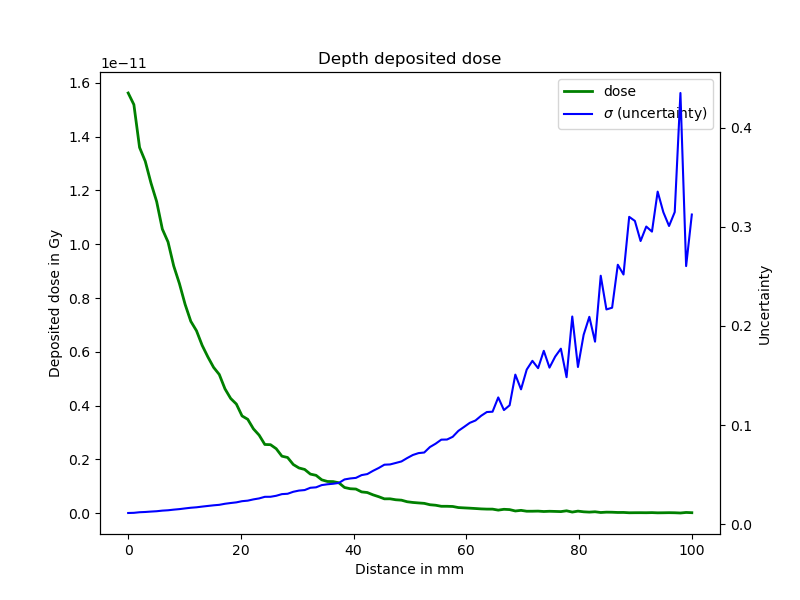

In [22]:
# Declare a single figure (one row, one column)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 6))

# X values from 0 to n, n is the length of d_edep
n = len(d_dose)
x = np.linspace(0, n, n)

# First curve, gamma depth in green
y = d_dose
c1 = ax.plot(x, y, 'g-', label='dose', linewidth=2)

# Second curve, gamma uncertainty in blue, share the same x axis, but use a
# different y axis
y = d_dose_uncert
ax2 = ax.twinx()
c2 = ax2.plot(x, y, 'b-', label='$\sigma$ (uncertainty)')

# Add the legend and the title
lns = c1+c2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.set_title('Depth deposited dose')
ax.set_xlabel('Distance in mm')
ax.set_ylabel('Deposited dose in Gy')
f = ax2.set_ylabel('Uncertainty')

# save on disk (optional)
plt.savefig('depth_dose.png',dpi=300,bbox_inches="tight",pad_inches=None)

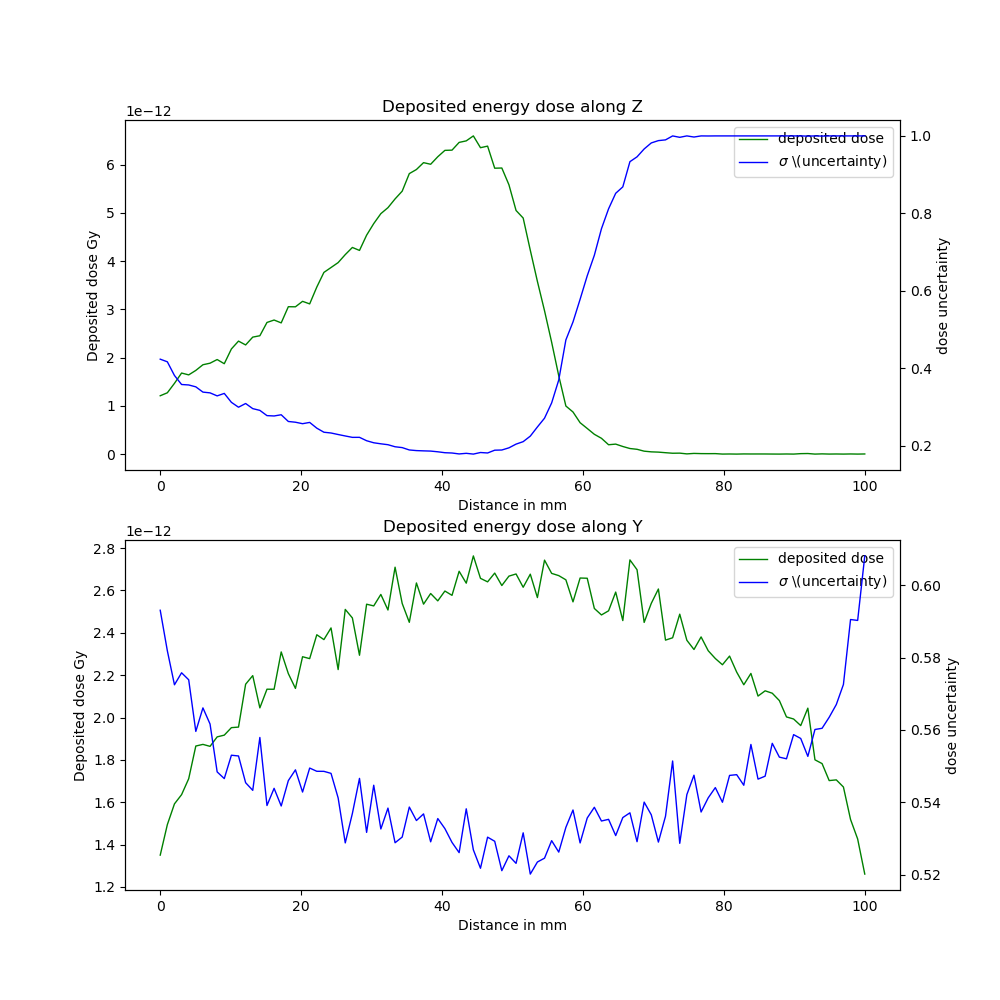

In [23]:
fig3, ax3 = plt.subplots(2,1,figsize=(10,10))
moy_dose=np.zeros(p_dose.shape[0])
moy_uncert=np.zeros(p_dose_uncert.shape[0])
for i in range(p_dose.shape[0]):
    subarr_dose=p_dose[i,:]
    moy_dose[i]=np.mean(subarr_dose)
    subarr_uncert=p_dose_uncert[i,:]
    moy_uncert[i]=np.mean(subarr_uncert)
# X values from 0 to n
# n is the number of slices
n = p_dose.shape[0]
x = np.linspace(0, n, n)
c1 = ax3[0].plot(x, moy_dose, 'g-', label='deposited dose', linewidth=1)
ax3[0].set_title('Deposited energy dose along Z')
ax3[0].set_xlabel('Distance in mm')
ax3[0].set_ylabel('Deposited dose Gy')
ax32 = ax3[0].twinx()
c2 = ax32.plot(x, moy_uncert, 'b-', label='$\sigma$ \(uncertainty)', linewidth=1)
f = ax32.set_ylabel('dose uncertainty')
lns = c1+c2
labs = [l.get_label() for l in lns]
ax3[0].legend(lns, labs, loc=0)
moy_dose=np.zeros(p_dose.shape[1])
moy_uncert=np.zeros(p_dose_uncert.shape[1])
for i in range(p_dose.shape[1]):
    subarr_dose=p_dose[:,i]
    moy_dose[i]=np.mean(subarr_dose)
    subarr_uncert=p_dose_uncert[:,i]
    moy_uncert[i]=np.mean(subarr_uncert)
# X values from 0 to n
# n is the number of slices
n = p_dose.shape[1]
x = np.linspace(0, n, n)
c1 = ax3[1].plot(x, moy_dose, 'g-', label='deposited dose', linewidth=1)
ax3[1].set_title('Deposited energy dose along Y')
ax3[1].set_xlabel('Distance in mm')
ax3[1].set_ylabel('Deposited dose Gy')
ax33 = ax3[1].twinx()
c2 = ax33.plot(x, moy_uncert, 'b-', label='$\sigma$ \(uncertainty)', linewidth=1)
f = ax33.set_ylabel('dose uncertainty')
lns = c1+c2
labs = [l.get_label() for l in lns]
ax3[1].legend(lns, labs, loc=0)
# save on disk (optional)
plt.savefig('profile_dose_alongZandY_averaged.png',dpi=300,bbox_inches="tight",pad_inches=None)

interactive(children=(IntSlider(value=50, description='sy'), IntSlider(value=50, description='sz'), Output()),…

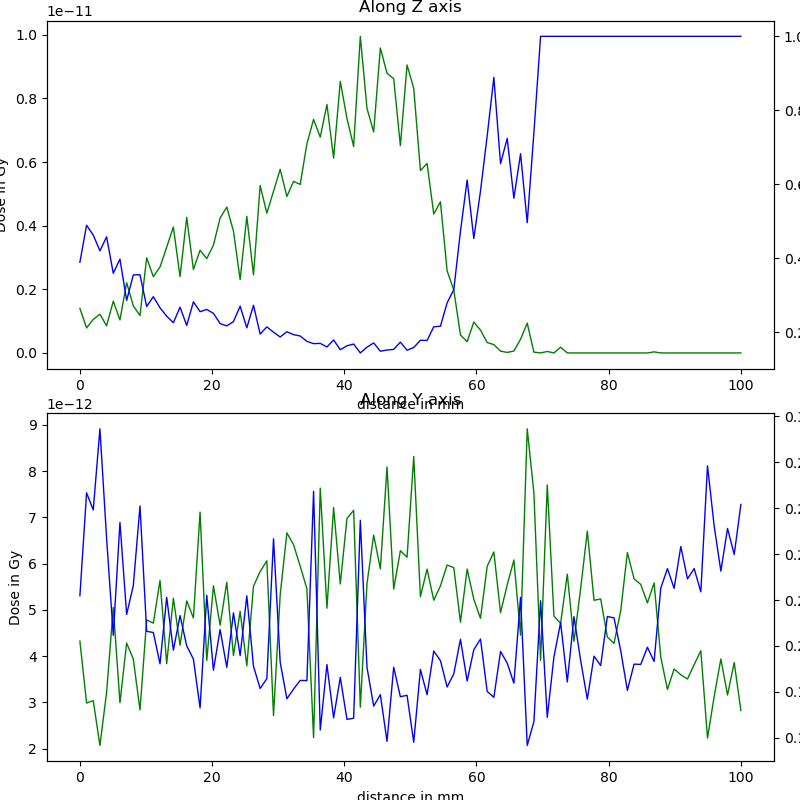

In [24]:
fig4, ax4 = plt.subplots(2,1,figsize=(8,8))
def show_p_dose(sy,sz):
    [l.remove for l in ax4[0].lines]
    [l.remove for l in ax4[1].lines]
    n1 = p_dose.shape[0]
    z = np.linspace(0, n1, n1)
    ax4[0].plot(z,p_dose[:,sy],'g',label='dose' ,linewidth=1.0)
    ax41 = ax4[0].twinx()
    ax41.plot(z,p_dose_uncert[:,sy],'b',label='$\sigma$ \(uncertainty)' ,linewidth=1.0)
    ax4[0].set_title('Along Z axis')
    ax4[0].set_xlabel('distance in mm')
    ax4[0].set_ylabel('Dose in Gy')
    ax41.set_ylabel('uncertainty')
    n2 = p_dose.shape[1]
    y = np.linspace(0, n2, n2)
    ax4[1].plot(y,p_dose[sz,:],'g',label='dose' ,linewidth=1.0)
    ax42 = ax4[1].twinx()
    ax42.plot(z,p_dose_uncert[sz,:],'b',label='$\sigma$ \(uncertainty)' ,linewidth=1.0)
    ax4[1].set_title('Along Y axis')
    ax4[1].set_xlabel('distance in mm')
    ax4[1].set_ylabel('Dose in Gy')
    ax42.set_ylabel('uncertainty')
plt.ion()
fig4.tight_layout()    
interact(show_p_dose, sy=(0,p_dose.shape[0]), sz=(0,p_dose.shape[1]));
# save on disk (optional)
plt.savefig('interactive_sideprofiles.png',dpi=300,bbox_inches="tight",pad_inches=None)
#the plots overlap when used in interactive mode and I'm not able to clear the previous plots left in memory